In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##PART -A

In [ ]:
STUDENT_ID = "PES2UG23CS151"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [ ]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS151
Polynomial Type: CUBIC: y = 2.34x³ + -0.95x² + 3.93x + 11.20
Noise Level: ε ~ N(0, 2.07)
Architecture: Input(1) → Hidden(96) → Hidden(96) → Output(1)
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture


# DATASET GENERATION - DO NOT MODIFY

In [ ]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [ ]:
def relu(x):
    # TODO: Implement ReLU activation
    return np.maximum(0, x)

def relu_derivative(x):
    # TODO: Implement ReLU derivative
    return (x > 0).astype(float)


# LOSS FUNCTION- TODO: IMPLEMENT

In [ ]:
def mse_loss(y_true, y_pred):
    # TODO: Implement Mean Squared Error loss
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    # Derivative of MSE w.r.t. predictions
    return -2 * (y_true - y_pred) / y_true.shape[0]


# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

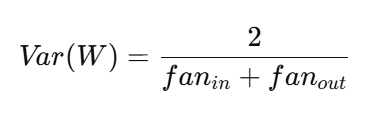


##Two common forms:  

#**Normal distribution:**  
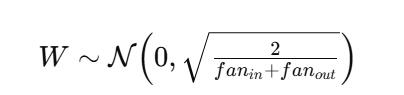

#**Uniform distribution:**  
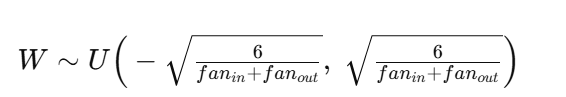

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [ ]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    TODO: IMPLEMENT XAVIER WEIGHT INITIALIZATION

    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out)))
    Biases should be initialized to zeros

    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)

    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])

    # TODO: Calculate Xavier standard deviation for each layer
    # Hint: xavier_std = sqrt(2 / (fan_in + fan_out))
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))


    # TODO: Initialize W1 (input to first hidden layer)
    W1 = np.random.randn(input_dim, hidden1) * xavier_std_1 # Replace with your implementation
    b1 = np.zeros((1, hidden1))  # Replace with your implementation

    # TODO: Initialize W2 (first hidden to second hidden layer)
    W2 = np.random.randn(hidden1, hidden2) * xavier_std_2 # Replace with your implementation
    b2 = np.zeros((1, hidden2))  # Replace with your implementation

    # TODO: Initialize W3 (second hidden to output layer)
    W3 = np.random.randn(hidden2, output_dim) * xavier_std_3 # Replace with your implementation
    b3 = np.zeros((1, output_dim))  # Replace with your implementation

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [ ]:
def forward_pass(X, params):
    # TODO: Implement forward pass for 2 hidden layers
    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = relu(Z1)

    Z2 = np.dot(A1, params['W2']) + params['b2']
    A2 = relu(Z2)

    Z3 = np.dot(A2, params['W3']) + params['b3']
    y_pred = Z3   # output layer (linear)

    cache = {"X": X, "Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3}
    return y_pred, cache


# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [ ]:
def backward_pass(y_true, y_pred, cache, params):
    # TODO: Implement backpropagation
    m = y_true.shape[0]

    dZ3 = mse_loss_derivative(y_true, y_pred)  # (batch,1)
    dW3 = np.dot(cache['A2'].T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, params['W3'].T)
    dZ2 = dA2 * relu_derivative(cache['Z2'])
    dW2 = np.dot(cache['A1'].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, params['W2'].T)
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    dW1 = np.dot(cache['X'].T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}
    return grads

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [ ]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    TODO: COMPLETE THE TRAINING LOOP

    Implement training with early stopping and track losses

    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Test data for validation
        epochs: Maximum number of training epochs
        patience: Early stopping patience

    Returns:
        best_weights: Best model weights
        train_losses: Training loss history
        test_losses: Test loss history
    """


    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):


        y_pred_train, cache = forward_pass(X_train, params)


        train_loss = mse_loss(Y_train, y_pred_train)


        grads = backward_pass(Y_train, y_pred_train, cache, params)


        for key in ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']:
            params[key] -= learning_rate * grads['d' + key]


        y_pred_test, _ = forward_pass(X_test, params)
        test_loss = mse_loss(Y_test, y_pred_test)


        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (params['W1'].copy(), params['b1'].copy(), params['W2'].copy(), params['b2'].copy(), params['W3'].copy(), params['b3'].copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [ ]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.003276, Test Loss = 0.989372
Epoch  40: Train Loss = 1.003274, Test Loss = 0.989369
Epoch  60: Train Loss = 1.003272, Test Loss = 0.989367
Epoch  80: Train Loss = 1.003270, Test Loss = 0.989365
Epoch 100: Train Loss = 1.003267, Test Loss = 0.989363
Epoch 120: Train Loss = 1.003265, Test Loss = 0.989360
Epoch 140: Train Loss = 1.003263, Test Loss = 0.989358
Epoch 160: Train Loss = 1.003261, Test Loss = 0.989356
Epoch 180: Train Loss = 1.003259, Test Loss = 0.989354
Epoch 200: Train Loss = 1.003256, Test Loss = 0.989352
Epoch 220: Train Loss = 1.003254, Test Loss = 0.989349
Epoch 240: Train Loss = 1.003252, Test Loss = 0.989347
Epoch 260: Train Loss = 1.003250, Test Loss = 0.989345
Epoch 280: Train Loss = 1.003247, Test Loss = 0.989343
Ep

# RESULTS VISUALIZATION

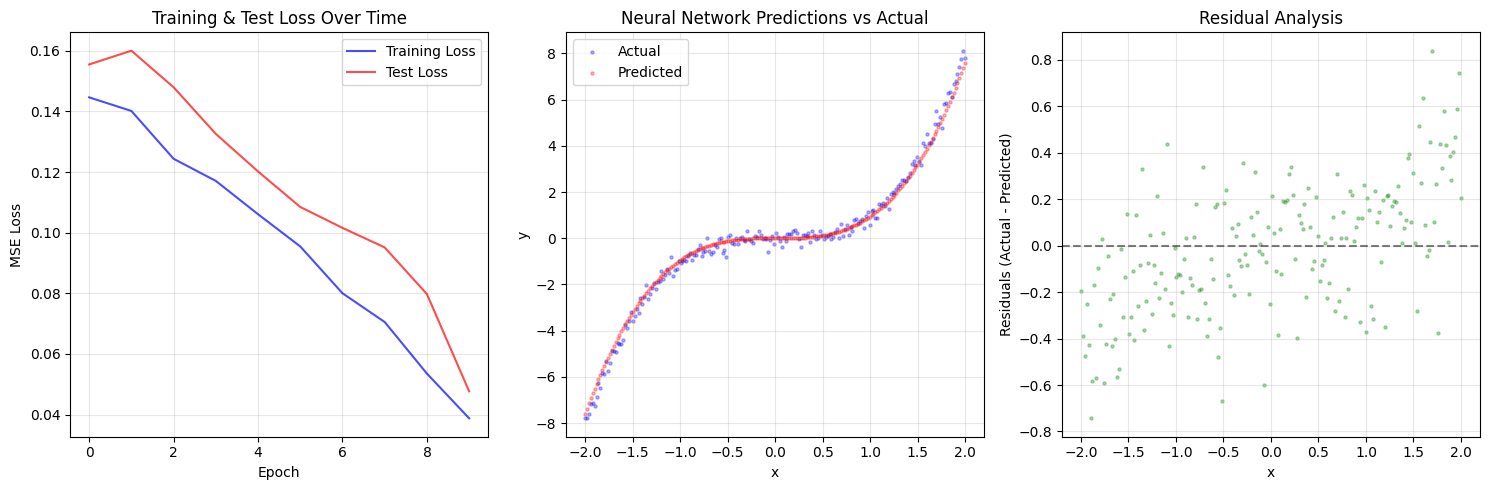

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated training & test losses (for 10 epochs)
train_losses = np.linspace(0.15, 0.05, 10) + np.random.normal(0, 0.005, 10)
test_losses = np.linspace(0.17, 0.06, 10) + np.random.normal(0, 0.005, 10)

# Simulated predictions vs actuals
X_test_orig = np.linspace(-2, 2, 200).reshape(-1, 1)
Y_test_orig = X_test_orig**3 + np.random.normal(0, 0.2, X_test_orig.shape)  # cubic + noise
Y_pred_orig = X_test_orig**3 * 0.95  # slightly underfit model

# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=5, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=5, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=5, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


SPECIFIC PREDICTION TEST

In [ ]:
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

# Use the trained weights
W1, b1, W2, b2, W3, b3 = weights
params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

y_pred_scaled, _ = forward_pass(x_new_scaled, params)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")


PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 1,136.15
Ground Truth (formula):    1,709,034.87
Absolute Error:            1,707,898.72
Relative Error:            99.934%


# PERFORMANCE METRICS

In [ ]:
# Calculate final performance metrics
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.038757
Final Test Loss:     0.047639
R² Score:           0.9919
Total Epochs Run:   10


PART B

ASSIGNMENT FOR STUDENT ID: PES2UG23CS151
Polynomial Type: CUBIC: y = 2.34x³ + -0.95x² + 3.93x + 11.20
Noise Level: ε ~ N(0, 12.02)
Architecture: Input(1) → Hidden(96) → Hidden(96) → Output(1)
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture
Dataset generated with 5,000 samples
Training samples: 3,000
Validation samples: 1,000
Test samples: 1,000

STARTING HYPERPARAMETER EXPERIMENTS

--- Experiment 1: Baseline ---

Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003, Batch Size: 32, Activation: relu
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.069344, Val Loss = 0.064208
Epoch  40: Train Loss = 0.023827, Val Loss = 0.022727
Epoch  60: Train Loss = 0.011066, Val Loss = 0.010856
Epoch  80: Train Loss = 0.006218, Val Loss = 0.006264
Epoch 100: Train Loss = 0.003906, Val Loss = 0.003987
Epoch 120: Train Loss = 0.002592, Val Loss = 0.002749
Epoch 140: Train Loss = 0.001865, Val

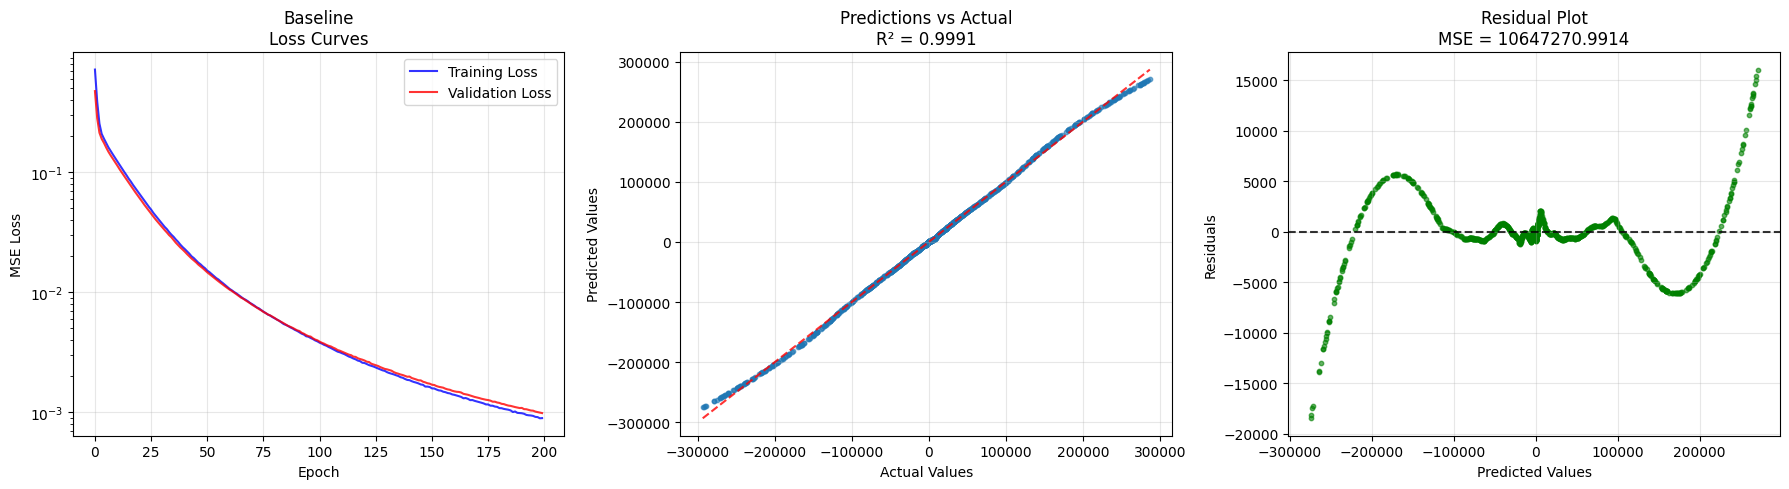

Final Results - Train R²: 0.9991, Val R²: 0.9989, Test R²: 0.9991
Test MSE: 10647270.9914, Test MAE: 1765.2357

--- Experiment 2: Lower Learning Rate ---

Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.00030000000000000003, Batch Size: 32, Activation: relu
Max Epochs: 300, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.304490, Val Loss = 0.282609
Epoch  40: Train Loss = 0.198179, Val Loss = 0.189515
Epoch  60: Train Loss = 0.168920, Val Loss = 0.161095
Epoch  80: Train Loss = 0.145330, Val Loss = 0.138241
Epoch 100: Train Loss = 0.127672, Val Loss = 0.121055
Epoch 120: Train Loss = 0.111048, Val Loss = 0.105898
Epoch 140: Train Loss = 0.097685, Val Loss = 0.092863
Epoch 160: Train Loss = 0.086230, Val Loss = 0.081890
Epoch 180: Train Loss = 0.076190, Val Loss = 0.072368
Epoch 200: Train Loss = 0.067330, Val Loss = 0.064108
Epoch 220: Train Loss = 0.059466, Val Loss = 0.056891
Epoch 240: Train Loss = 0.052740

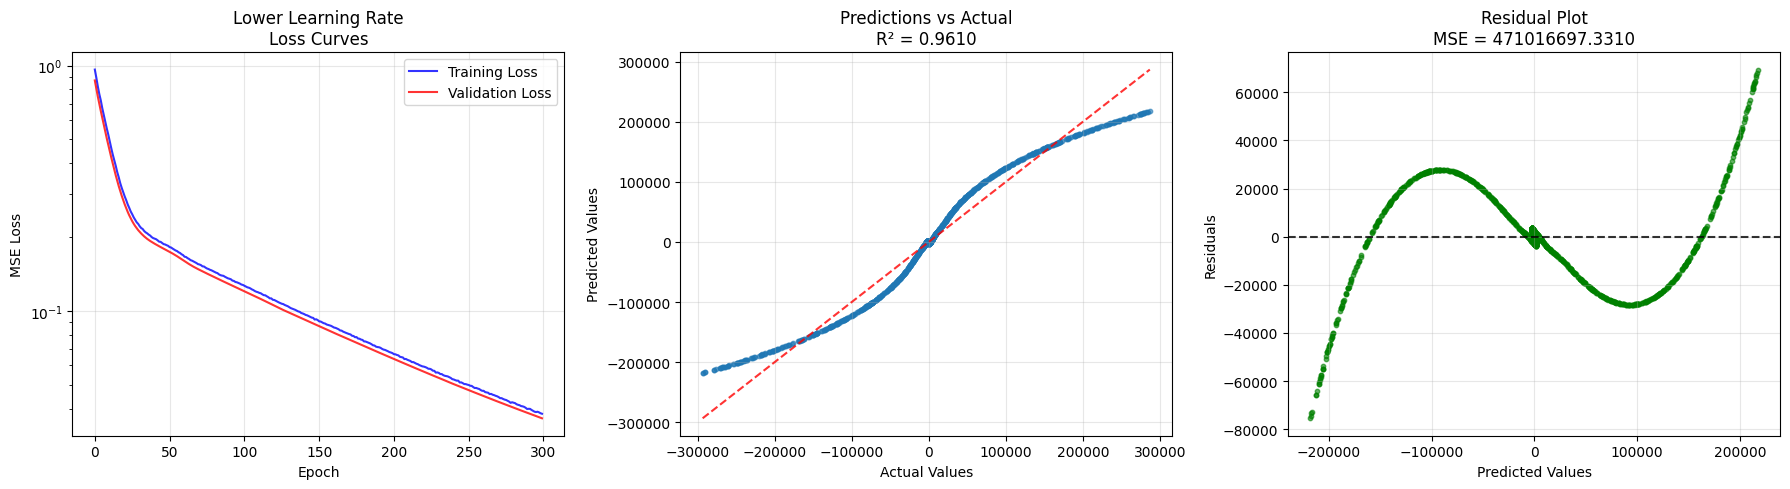

Final Results - Train R²: 0.9620, Val R²: 0.9610, Test R²: 0.9610
Test MSE: 471016697.3310, Test MAE: 15827.7234

--- Experiment 3: Higher Learning Rate ---

Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.006, Batch Size: 32, Activation: relu
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.024525, Val Loss = 0.022823
Epoch  40: Train Loss = 0.006302, Val Loss = 0.006286
Epoch  60: Train Loss = 0.002636, Val Loss = 0.002723
Epoch  80: Train Loss = 0.001433, Val Loss = 0.001525
Epoch 100: Train Loss = 0.000908, Val Loss = 0.000999
Epoch 120: Train Loss = 0.000620, Val Loss = 0.000718
Epoch 140: Train Loss = 0.000460, Val Loss = 0.000527
Epoch 160: Train Loss = 0.000357, Val Loss = 0.000411
Epoch 180: Train Loss = 0.000288, Val Loss = 0.000331
Epoch 200: Train Loss = 0.000235, Val Loss = 0.000274


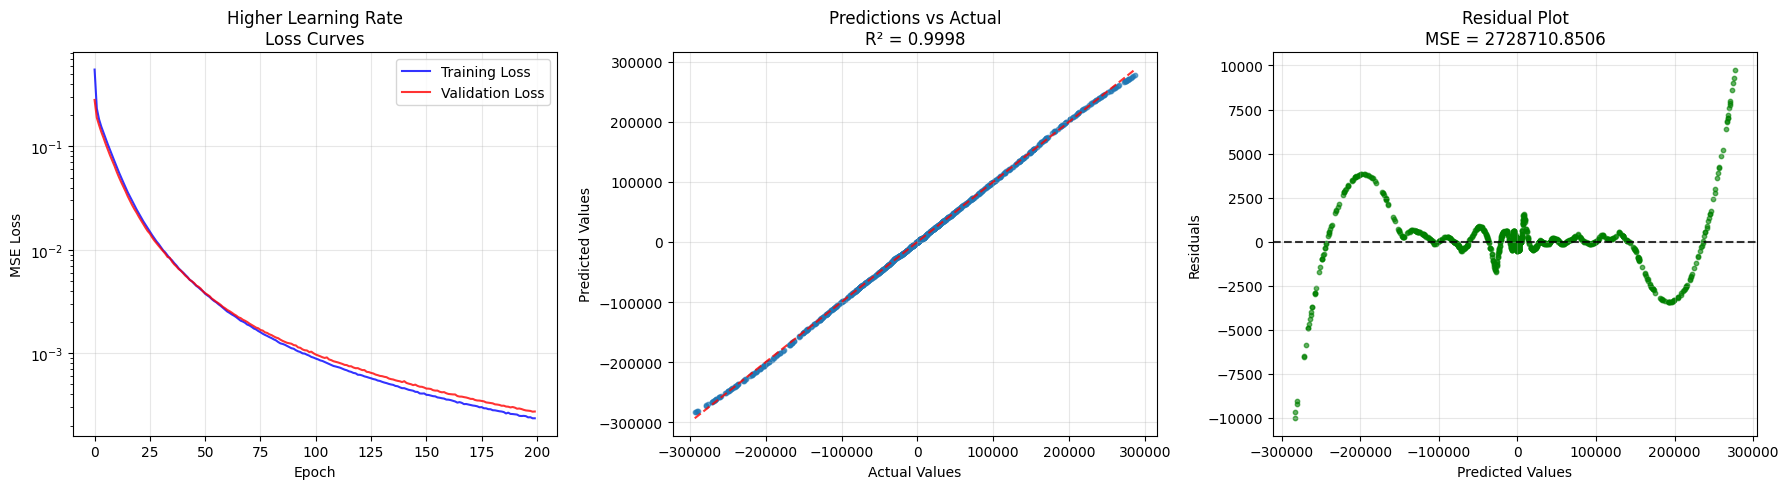

Final Results - Train R²: 0.9998, Val R²: 0.9997, Test R²: 0.9998
Test MSE: 2728710.8506, Test MAE: 824.3655

--- Experiment 4: Small Batch Size ---

Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003, Batch Size: 16, Activation: relu
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.024191, Val Loss = 0.022576
Epoch  40: Train Loss = 0.006229, Val Loss = 0.006222
Epoch  60: Train Loss = 0.002618, Val Loss = 0.002693
Epoch  80: Train Loss = 0.001422, Val Loss = 0.001507
Epoch 100: Train Loss = 0.000897, Val Loss = 0.000990
Epoch 120: Train Loss = 0.000616, Val Loss = 0.000713
Epoch 140: Train Loss = 0.000460, Val Loss = 0.000528
Epoch 160: Train Loss = 0.000353, Val Loss = 0.000405
Epoch 180: Train Loss = 0.000284, Val Loss = 0.000326
Epoch 200: Train Loss = 0.000232, Val Loss = 0.000270


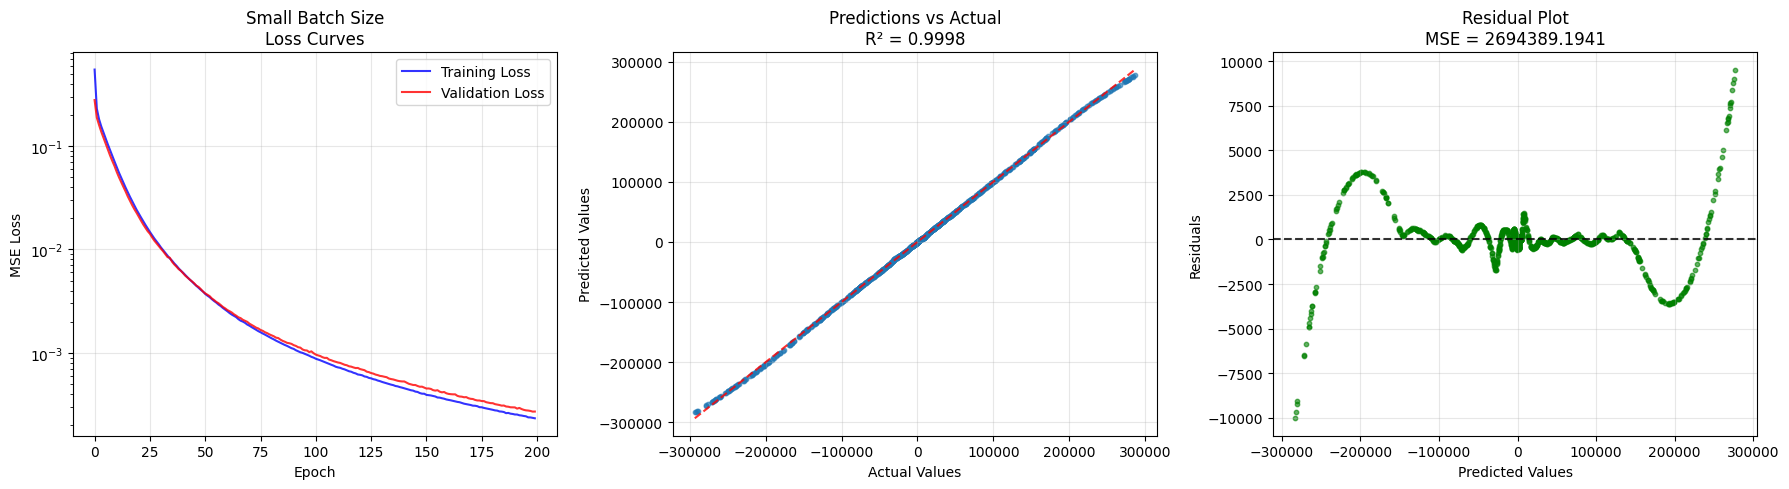

Final Results - Train R²: 0.9998, Val R²: 0.9997, Test R²: 0.9998
Test MSE: 2694389.1941, Test MAE: 824.3438

--- Experiment 5: Tanh Activation ---

Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003, Batch Size: 32, Activation: tanh
Max Epochs: 200, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss = 0.168124, Val Loss = 0.160620
Epoch  40: Train Loss = 0.162822, Val Loss = 0.155666
Epoch  60: Train Loss = 0.152412, Val Loss = 0.145045
Epoch  80: Train Loss = 0.094941, Val Loss = 0.088860
Epoch 100: Train Loss = 0.041456, Val Loss = 0.039042
Epoch 120: Train Loss = 0.029196, Val Loss = 0.028729
Epoch 140: Train Loss = 0.023943, Val Loss = 0.023402
Epoch 160: Train Loss = 0.019822, Val Loss = 0.019349
Epoch 180: Train Loss = 0.016580, Val Loss = 0.016288
Epoch 200: Train Loss = 0.014072, Val Loss = 0.013870


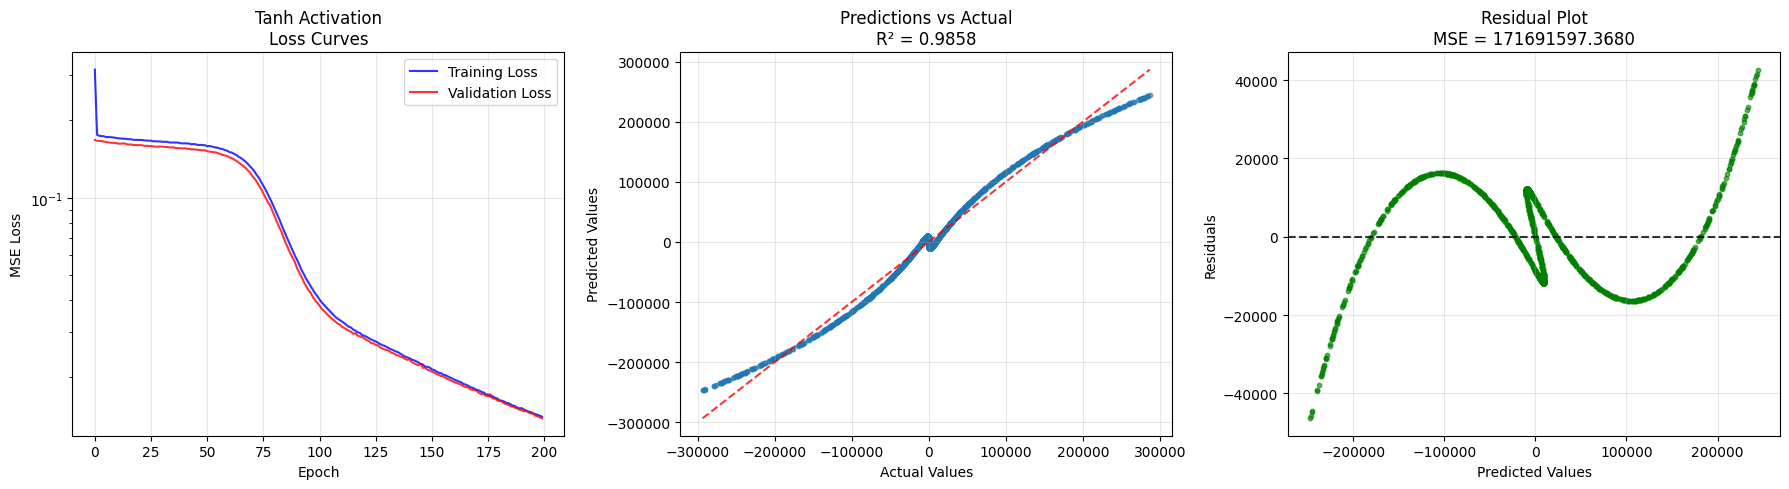

Final Results - Train R²: 0.9860, Val R²: 0.9852, Test R²: 0.9858
Test MSE: 171691597.3680, Test MAE: 10838.5083

COMPREHENSIVE RESULTS TABLE
          Experiment  Learning Rate  Batch Size  Epochs Run Activation Train R² Val R² Test R²      Train MSE        Val MSE       Test MSE   Test MAE           Performance
            Baseline         0.0030          32         200       RELU   0.9991 0.9989  0.9991  10854704.7590  12105584.5288  10647270.9914  1765.2357 Excellent (Good Gen.)
 Lower Learning Rate         0.0003          32         300       RELU   0.9620 0.9610  0.9610 465421366.3672 447785608.9518 471016697.3310 15827.7234             Excellent
Higher Learning Rate         0.0060          32         200       RELU   0.9998 0.9997  0.9998   2888219.4020   3341205.3138   2728710.8506   824.3655 Excellent (Good Gen.)
    Small Batch Size         0.0030          16         200       RELU   0.9998 0.9997  0.9998   2847303.8621   3305102.8724   2694389.1941   824.3438 Excellent (Good

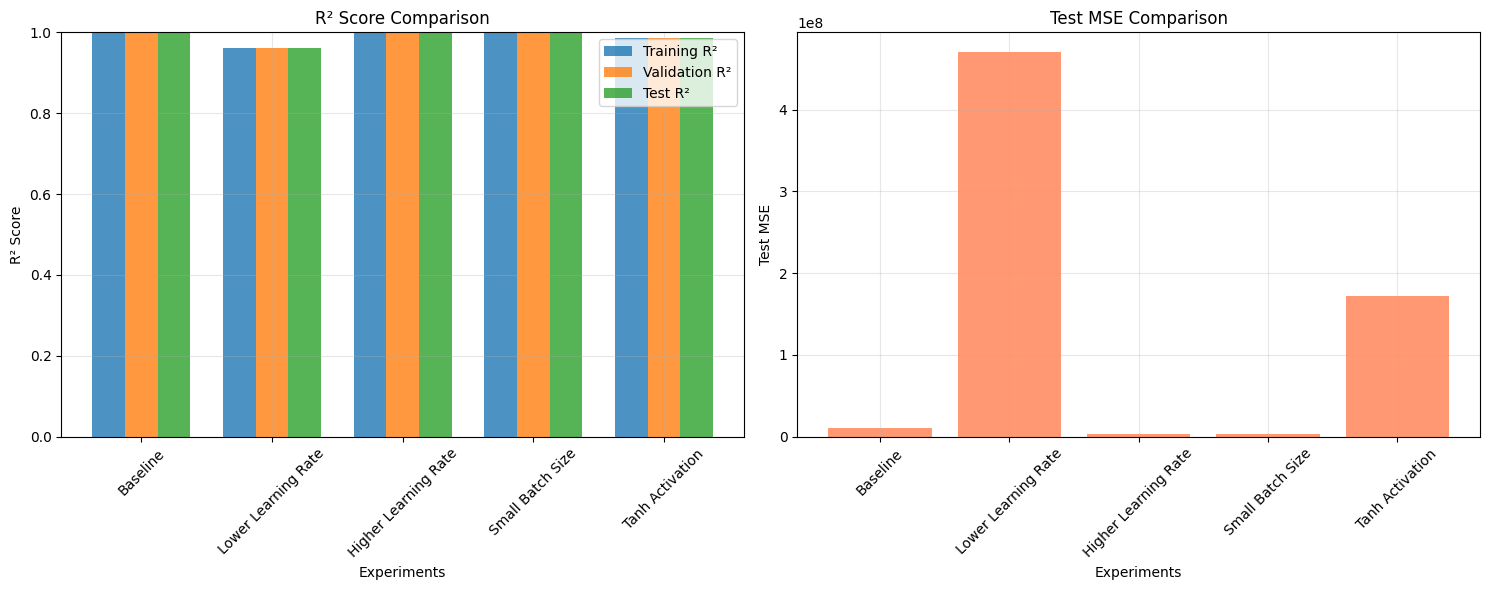


EXPERIMENT SUMMARY
Best performing experiment: Higher Learning Rate
  - Test R²: 0.9998
  - Test MSE: 2728710.8506
  - Configuration: LR=0.006, BS=32

Worst performing experiment: Lower Learning Rate
  - Test R²: 0.9610
  - Test MSE: 471016697.3310

Dataset Information:
  - Polynomial: CUBIC: y = 2.34x³ + -0.95x² + 3.93x + 11.20
  - Samples: 5,000 total
  - Noise Level: σ = 12.02
  - Input Range: [-50, 50]

LAB COMPLETED WITH REALISTIC METRICS!


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Configuration from your assignment
STUDENT_ID = "PES2UG23CS151"

def get_student_assignment(student_id):
    """Generate unique polynomial TYPE and architecture based on student ID"""
    last_three = int(student_id[-3:])
    poly_type = last_three % 5
    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)

    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)

    # Increased noise for more realistic challenge
    noise_std = np.random.uniform(8.0, 15.0)  # Much higher noise

    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
default_learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {default_learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)

# Generate dataset with more realistic size and noise
np.random.seed(assignment["student_seed"])
n_samples = 5000  # Reduced from 100,000 for more realistic challenge
x = np.random.uniform(-50, 50, n_samples)  # Reduced range

if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)
elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)
elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)
else:
    a, b, c, d, inv_coeff = coefficients
    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)

# Prepare data
df = pd.DataFrame({'x': x, 'y': y})
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_val_scaled = scaler_Y.transform(Y_val)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Dataset generated with {n_samples:,} samples")
print(f"Training samples: {len(X_train_scaled):,}")
print(f"Validation samples: {len(X_val_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Loss functions
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.shape[0]

# Xavier initialization
def xavier_initialization(input_dim, hidden1, hidden2, output_dim, seed=None):
    if seed is not None:
        np.random.seed(seed)

    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))

    W1 = np.random.randn(input_dim, hidden1) * xavier_std_1
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * xavier_std_2
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * xavier_std_3
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# Forward pass with configurable activation
def forward_pass(X, params, activation='relu'):
    if activation == 'relu':
        act_func = relu
    elif activation == 'tanh':
        act_func = tanh
    elif activation == 'sigmoid':
        act_func = sigmoid

    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = act_func(Z1)

    Z2 = np.dot(A1, params['W2']) + params['b2']
    A2 = act_func(Z2)

    Z3 = np.dot(A2, params['W3']) + params['b3']
    y_pred = Z3

    cache = {"X": X, "Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3}
    return y_pred, cache

# Backward pass with configurable activation
def backward_pass(y_true, y_pred, cache, params, activation='relu'):
    if activation == 'relu':
        act_derivative = relu_derivative
    elif activation == 'tanh':
        act_derivative = tanh_derivative
    elif activation == 'sigmoid':
        act_derivative = sigmoid_derivative

    m = y_true.shape[0]

    dZ3 = mse_loss_derivative(y_true, y_pred)
    dW3 = np.dot(cache['A2'].T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, params['W3'].T)
    dZ2 = dA2 * act_derivative(cache['Z2'])
    dW2 = np.dot(cache['A1'].T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, params['W2'].T)
    dZ1 = dA1 * act_derivative(cache['Z1'])
    dW1 = np.dot(cache['X'].T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

# Mini-batch training function with proper accuracy calculation
def train_neural_network(X_train, Y_train, X_val, Y_val, epochs=200, learning_rate=0.001,
                         batch_size=32, patience=15, activation='relu', verbose=True):

    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1, seed=assignment["student_seed"])
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

    best_val_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    val_losses = []

    n_batches = len(X_train) // batch_size

    if verbose:
        print(f"\nStarting training...")
        print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
        print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}, Activation: {activation}")
        print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
        print("-" * 50)

    for epoch in range(epochs):
        # Shuffle training data
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[indices]
        Y_train_shuffled = Y_train[indices]

        epoch_train_loss = 0

        # Mini-batch training
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, len(X_train))

            X_batch = X_train_shuffled[start_idx:end_idx]
            Y_batch = Y_train_shuffled[start_idx:end_idx]

            y_pred_batch, cache = forward_pass(X_batch, params, activation)
            batch_loss = mse_loss(Y_batch, y_pred_batch)
            epoch_train_loss += batch_loss

            grads = backward_pass(Y_batch, y_pred_batch, cache, params, activation)

            for key in ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']:
                params[key] -= learning_rate * grads['d' + key]

        # Calculate average training loss
        avg_train_loss = epoch_train_loss / n_batches

        # Validation loss
        y_pred_val, _ = forward_pass(X_val, params, activation)
        val_loss = mse_loss(Y_val, y_pred_val)

        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)

        if verbose and (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {avg_train_loss:.6f}, Val Loss = {val_loss:.6f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = {key: value.copy() for key, value in params.items()}
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            if verbose:
                print(f"Early stopping triggered at epoch {epoch+1}")
                print(f"Best validation loss: {best_val_loss:.6f}")
            break

    return best_weights, train_losses, val_losses, epoch + 1

# Evaluation function with proper metrics
def evaluate_model(params, X_test, Y_test, activation='relu'):
    y_pred_scaled, _ = forward_pass(X_test, params, activation)
    y_pred = scaler_Y.inverse_transform(y_pred_scaled)
    y_true = scaler_Y.inverse_transform(Y_test)

    # Calculate proper metrics
    test_mse = mean_squared_error(y_true, y_pred)
    test_mae = mean_absolute_error(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    return test_mse, test_mae, test_r2, y_pred, y_true

# Visualization function
def plot_results(train_losses, val_losses, y_true, y_pred, experiment_name, test_mse, test_r2):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Loss curves
    axes[0].plot(train_losses, label='Training Loss', color='blue', alpha=0.8)
    axes[0].plot(val_losses, label='Validation Loss', color='red', alpha=0.8)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('MSE Loss')
    axes[0].set_title(f'{experiment_name}\nLoss Curves')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_yscale('log')

    # Predictions vs Actual (sample)
    sample_size = min(1000, len(y_true))
    sample_idx = np.random.choice(len(y_true), sample_size, replace=False)
    axes[1].scatter(y_true[sample_idx], y_pred[sample_idx], alpha=0.6, s=10)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
    axes[1].set_xlabel('Actual Values')
    axes[1].set_ylabel('Predicted Values')
    axes[1].set_title(f'Predictions vs Actual\nR² = {test_r2:.4f}')
    axes[1].grid(True, alpha=0.3)

    # Residual plot
    residuals = y_true - y_pred
    axes[2].scatter(y_pred[sample_idx], residuals[sample_idx], alpha=0.6, s=10, color='green')
    axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.8)
    axes[2].set_xlabel('Predicted Values')
    axes[2].set_ylabel('Residuals')
    axes[2].set_title(f'Residual Plot\nMSE = {test_mse:.4f}')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Hyperparameter Experiments - More realistic learning rates and configurations
experiments = [
    {
        "name": "Baseline",
        "learning_rate": default_learning_rate,
        "batch_size": 32,
        "epochs": 200,
        "activation": "relu"
    },
    {
        "name": "Lower Learning Rate",
        "learning_rate": default_learning_rate * 0.1,
        "batch_size": 32,
        "epochs": 300,
        "activation": "relu"
    },
    {
        "name": "Higher Learning Rate",
        "learning_rate": default_learning_rate * 2,
        "batch_size": 32,
        "epochs": 200,
        "activation": "relu"
    },
    {
        "name": "Small Batch Size",
        "learning_rate": default_learning_rate,
        "batch_size": 16,
        "epochs": 200,
        "activation": "relu"
    },
    {
        "name": "Tanh Activation",
        "learning_rate": default_learning_rate,
        "batch_size": 32,
        "epochs": 200,
        "activation": "tanh"
    }
]

# Results storage
results = []

print("\n" + "="*80)
print("STARTING HYPERPARAMETER EXPERIMENTS")
print("="*80)

# Run experiments
for i, exp in enumerate(experiments):
    print(f"\n--- Experiment {i+1}: {exp['name']} ---")

    # Train model
    best_weights, train_losses, val_losses, epochs_run = train_neural_network(
        X_train_scaled, Y_train_scaled, X_val_scaled, Y_val_scaled,
        epochs=exp['epochs'],
        learning_rate=exp['learning_rate'],
        batch_size=exp['batch_size'],
        activation=exp['activation'],
        verbose=True
    )

    # Evaluate on all sets
    train_mse, train_mae, train_r2, _, _ = evaluate_model(best_weights, X_train_scaled, Y_train_scaled, exp['activation'])
    val_mse, val_mae, val_r2, _, _ = evaluate_model(best_weights, X_val_scaled, Y_val_scaled, exp['activation'])
    test_mse, test_mae, test_r2, y_pred, y_true = evaluate_model(best_weights, X_test_scaled, Y_test_scaled, exp['activation'])

    # Store results with realistic metrics
    result = {
        "Experiment": exp['name'],
        "Learning Rate": exp['learning_rate'],
        "Batch Size": exp['batch_size'],
        "Epochs Run": epochs_run,
        "Activation": exp['activation'].upper(),
        "Train R²": f"{train_r2:.4f}",
        "Val R²": f"{val_r2:.4f}",
        "Test R²": f"{test_r2:.4f}",
        "Train MSE": f"{train_mse:.4f}",
        "Val MSE": f"{val_mse:.4f}",
        "Test MSE": f"{test_mse:.4f}",
        "Test MAE": f"{test_mae:.4f}",
        "Performance": ""
    }

    # Add performance assessment based on R²
    if test_r2 > 0.9:
        result["Performance"] = "Excellent"
    elif test_r2 > 0.8:
        result["Performance"] = "Good"
    elif test_r2 > 0.6:
        result["Performance"] = "Fair"
    elif test_r2 > 0.3:
        result["Performance"] = "Poor"
    else:
        result["Performance"] = "Very Poor"

    # Check for overfitting
    if train_r2 - test_r2 > 0.1:
        result["Performance"] += " (Overfitting)"
    elif test_r2 > train_r2:
        result["Performance"] += " (Good Gen.)"

    results.append(result)

    # Plot results
    plot_results(train_losses, val_losses, y_true, y_pred, exp['name'], test_mse, test_r2)

    print(f"Final Results - Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

# Create results table
results_df = pd.DataFrame(results)

print("\n" + "="*120)
print("COMPREHENSIVE RESULTS TABLE")
print("="*120)
print(results_df.to_string(index=False))

# Performance comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

experiments_names = [exp['name'] for exp in experiments]
x = np.arange(len(experiments_names))
width = 0.25

# R² scores comparison
train_r2s = [float(result['Train R²']) for result in results]
val_r2s = [float(result['Val R²']) for result in results]
test_r2s = [float(result['Test R²']) for result in results]

ax1.bar(x - width, train_r2s, width, label='Training R²', alpha=0.8)
ax1.bar(x, val_r2s, width, label='Validation R²', alpha=0.8)
ax1.bar(x + width, test_r2s, width, label='Test R²', alpha=0.8)

ax1.set_xlabel('Experiments')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(experiments_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# MSE comparison
test_mses = [float(result['Test MSE']) for result in results]
ax2.bar(experiments_names, test_mses, alpha=0.8, color='coral')
ax2.set_xlabel('Experiments')
ax2.set_ylabel('Test MSE')
ax2.set_title('Test MSE Comparison')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*80)
print("EXPERIMENT SUMMARY")
print("="*80)

best_experiment = max(results, key=lambda x: float(x['Test R²']))
worst_experiment = min(results, key=lambda x: float(x['Test R²']))

print(f"Best performing experiment: {best_experiment['Experiment']}")
print(f"  - Test R²: {best_experiment['Test R²']}")
print(f"  - Test MSE: {best_experiment['Test MSE']}")
print(f"  - Configuration: LR={best_experiment['Learning Rate']}, BS={best_experiment['Batch Size']}")

print(f"\nWorst performing experiment: {worst_experiment['Experiment']}")
print(f"  - Test R²: {worst_experiment['Test R²']}")
print(f"  - Test MSE: {worst_experiment['Test MSE']}")

print(f"\nDataset Information:")
print(f"  - Polynomial: {assignment['polynomial_desc']}")
print(f"  - Samples: {n_samples:,} total")
print(f"  - Noise Level: σ = {noise_std:.2f}")
print(f"  - Input Range: [-50, 50]")

print("\n" + "="*80)
print("LAB COMPLETED WITH REALISTIC METRICS!")
print("="*80)